# Preparing the Data
#### Examine then clean


In [1]:
import pandas as pd
ri = pd.read_csv('data/traffic_stops_ri.csv')
ri.head(3)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


#### Locate missing values 

In [2]:
#calculate the sum of all missing values in each column
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [3]:
#drop county_name column in place, specify you are dropping it from the columns using axis='columns'
ri.drop('county_name', axis='columns', inplace=True)

## Drop rows
#### use dropna(subset['stop_date', 'stop_time'], inplace=True)

In [4]:
#drop rows that are missing stop date OR stop time
ri.dropna(subset=['stop_date', 'stop_time'], inplace=True)

# Using Property Data Types 

#### Examining the data types
#### Every series (column) has a data type


In [5]:
ri.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

#### Data types matter because they affect what operations can be used on particular series 

## Fixing a data type 

In [6]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

bool


In [7]:
ri.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

# Creating a DatetimeIndex 

### Combining object columns 

In [8]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

In [9]:
combined.head()

0    2005-01-04 12:55
1    2005-01-23 23:15
2    2005-02-17 04:15
3    2005-02-20 17:15
4    2005-02-24 01:20
Name: stop_date, dtype: object

In [10]:
ri['date_and_time'] = pd.to_datetime(combined)

In [11]:
ri.set_index('date_and_time', inplace=True)

In [12]:
# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='date_and_time', length=91741, freq=None)
Index(['state', 'stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


# Do the genders commit different violations?

### Counting Unique values
* .value_counts : counts unique values in a series
* best suited for categorical data
* apply to a particular using:
    * df.column.value_counts()

In [13]:
ri.stop_outcome.value_counts()

Citation            77092
Warning              5137
Arrest Driver        2735
No Action             625
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

### Getting proportions from the value counts
* use df.column.value_counts(normalize=True)

In [14]:
ri.stop_outcome.value_counts(normalize=True)*100

Citation            89.083535
Warning              5.936052
Arrest Driver        3.160425
No Action            0.722218
N/D                  0.701418
Arrest Passenger     0.396353
Name: stop_outcome, dtype: float64

## Filtering DataFrame rows 

In [15]:
ri.driver_race.value_counts()

White       61872
Black       12285
Hispanic     9727
Asian        2390
Other         265
Name: driver_race, dtype: int64

In [16]:
#filter for 'white race' drivers
white = ri[ri.driver_race == 'White']

In [17]:
white.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
date_and_time,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [18]:
black = ri[ri.driver_race == 'Black']
black.stop_outcome.value_counts(normalize=True)*100

Citation            85.722426
Warning              6.512007
Arrest Driver        5.429385
N/D                  0.854701
Arrest Passenger     0.830281
No Action            0.651201
Name: stop_outcome, dtype: float64

In [19]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender =='F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender=='M']

# Compute the violations by female drivers (as proportions)
print("Females")
print(female.violation.value_counts(normalize=True))

print('\n')

# Compute the violations by male drivers (as proportions)
print("Males")
print(male.violation.value_counts(normalize=True))

Females
Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


Males
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


# Does gender affect who gets a ticket for speeding? 

### Filtering by multiple conditions 

### Arrested Females
* Requires two conditions gender = "F" and arrested=True

In [21]:
#female and arrested
female_and_arrested = ri[(ri.driver_gender == 'F') & (ri.is_arrested == True)]

In [22]:
#female or arrested
female_or_arrested = ri[(ri.driver_gender=='F')| (ri.is_arrested == True)]

In [25]:
female_and_arrested.shape

(669, 14)

In [26]:
female_or_arrested.shape

(31385, 14)

In [27]:
female.shape

(23774, 14)

### Stop Outcomes when violation is Speeding, grouped by gender

In [31]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender=='F') & (ri.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender=='M')& (ri.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print("Proportion of Outcome of Speeding Violation when Driver is Female")
print(female_and_speeding.stop_outcome.value_counts(normalize=True))
print('\n'+ '\n')

# Compute the stop outcomes for male drivers (as proportions)
print("Proportion of Outcome of Speeding Violation when Driver is Male")
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Proportion of Outcome of Speeding Violation when Driver is Female
Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64



Proportion of Outcome of Speeding Violation when Driver is Male
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


# Does Gender Affect Whose Vehicle is Searched? 

## Math with Boolean Values 

In [32]:
import numpy as np

In [33]:
ri.is_arrested.value_counts(normalize=True)

False    0.909746
True     0.090254
Name: is_arrested, dtype: float64

In [36]:
ri.is_arrested.mean()

0.09025408486936048

## Groupby 

In [38]:
#view the unique district names
ri.district.unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

In [39]:
ri[ri.district == 'Zone K1'].is_arrested.mean()

0.06718137819774142

### The above would need to be repeated for each district... use groupby() instead.

In [40]:
ri.groupby('district').is_arrested.mean()

district
Zone K1    0.067181
Zone K2    0.069522
Zone K3    0.072286
Zone X1    0.230044
Zone X3    0.082466
Zone X4    0.117674
Name: is_arrested, dtype: float64

## Group by multiple columns 

In [41]:
#groupby district and gender
ri.groupby(['district', 'driver_gender']).is_arrested.mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested, dtype: float64

In [42]:
#groupby district, gender and race
ri.groupby(['district', 'driver_gender', 'driver_race']).is_arrested.mean()

district  driver_gender  driver_race
Zone K1   F              Asian          0.033333
                         Black          0.067073
                         Hispanic       0.075000
                         Other          0.000000
                         White          0.013218
          M              Asian          0.000000
                         Black          0.048333
                         Hispanic       0.059801
                         Other          0.000000
                         White          0.022536
Zone K2   F              Asian          0.020619
                         Black          0.041408
                         Hispanic       0.044643
                         Other          0.000000
                         White          0.018243
          M              Asian          0.008571
                         Black          0.044040
                         Hispanic       0.060842
                         Other          0.000000
                         White  

In [43]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.963953
True     0.036047
Name: search_conducted, dtype: float64
0.03604713268876511


In [44]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender=='F'].search_conducted.mean())

0.019180617481282074


In [45]:
# Calculate the search rate for male drivers
print(ri[ri.driver_gender=='M'].search_conducted.mean())

0.04542557598546892


In [46]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


In [48]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['search_conducted', 'driver_gender', 'violation']).mean())

                                                    is_arrested  \
search_conducted driver_gender violation                          
False            F             Equipment               0.051229   
                               Moving violation        0.048464   
                               Other                   0.097345   
                               Registration/plates     0.071142   
                               Seat belt               0.021127   
                               Speeding                0.004254   
                 M             Equipment               0.043617   
                               Moving violation        0.033932   
                               Other                   0.049844   
                               Registration/plates     0.070369   
                               Seat belt               0.023658   
                               Speeding                0.009447   
True             F             Equipment               0.46000

In [49]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender', 'violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


# Does Gender Affect Who is Frisked During a Search? 

In [50]:
ri.search_conducted.value_counts()

False    88434
True      3307
Name: search_conducted, dtype: int64

In [51]:
ri.search_type.value_counts(dropna=False)

NaN                                                         88434
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

## Notice that some of the "search_type" values contain strings consisting of other "search_types"
## If we wanted to get a summary statistic of "inventory" we would need to count all events that resulted in an "inventory" search, including those of compounded "search_types."
To do this we need to search the strings in the values.

In [54]:
#assign to new column boolean values
#depending on whether the search_type column contains the term "Inventory" 
#within the string describing the search_type
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False)

In [55]:
ri.inventory.head()

date_and_time
2005-01-04 12:55:00    False
2005-01-23 23:15:00    False
2005-02-17 04:15:00    False
2005-02-20 17:15:00    False
2005-02-24 01:20:00    False
Name: inventory, dtype: bool

In [57]:
ri.inventory.sum()

441

In [59]:
searched = ri[ri.search_conducted == True]
searched.inventory.mean()

0.13335349259147264

In [62]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [65]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

In [67]:
searched.frisk.mean()

0.09162382824312065

In [68]:
# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


<h1><font color='red'> Visual Exploratory Data Analysis</font></h1>

In [70]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby([ri.index.hour]).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby([ri.index.hour]).is_arrested.mean()

0.09025408486936048
date_and_time
0     0.121206
1     0.144250
2     0.144120
3     0.148370
4     0.179310
5     0.178899
6     0.043614
7     0.053497
8     0.073591
9     0.070199
10    0.069306
11    0.075217
12    0.087040
13    0.078964
14    0.080171
15    0.080526
16    0.089505
17    0.107914
18    0.089883
19    0.078508
20    0.091482
21    0.153265
22    0.110715
23    0.108225
Name: is_arrested, dtype: float64


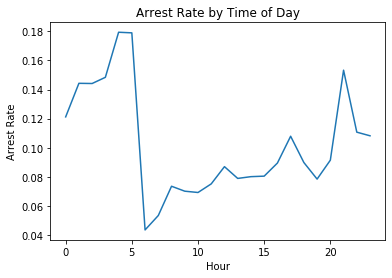

In [71]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
plt.plot(hourly_arrest_rate)

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

<h1><font color='red'>Are drug related stops on the rise?</font></h1>

### Resampling: when you change the frequency of your time-series observations
i.e. altering the time periods from hourly to daily or monthly to yearly, etc.

date_and_time
2005-12-31    0.006390
2006-12-31    0.006913
2007-12-31    0.007520
2008-12-31    0.006998
2009-12-31    0.009079
2010-12-31    0.009407
2011-12-31    0.009035
2012-12-31    0.009388
2013-12-31    0.012283
2014-12-31    0.013280
2015-12-31    0.011787
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


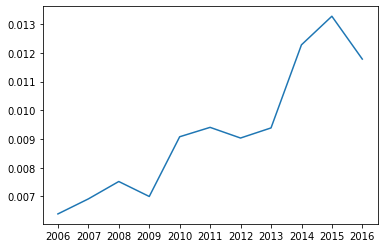

In [72]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
plt.plot(annual_drug_rate)

# Display the plot
plt.show()

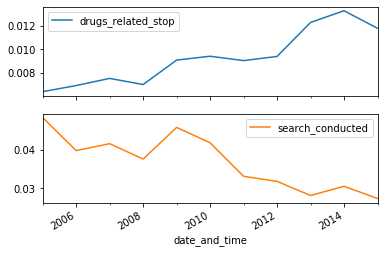

In [73]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

<h1><font color='red'>What violations are caught in each district?</font></h1>

### Computing a frequency table
### pd.crosstab('col1', 'col2')

In [80]:
table = pd.crosstab(ri.driver_race,  ri.driver_gender)

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


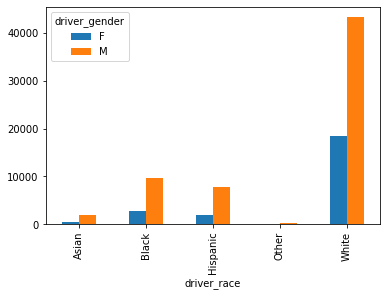

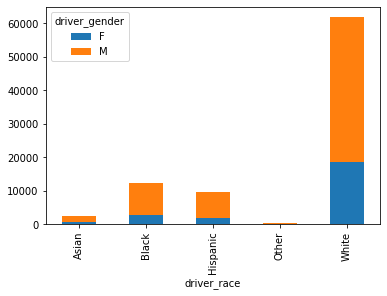

In [89]:
display(table)
table.plot(kind='bar')
table.plot(kind='bar', stacked =True)

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774


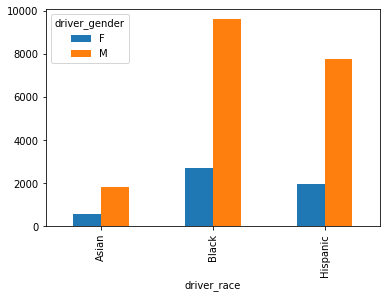

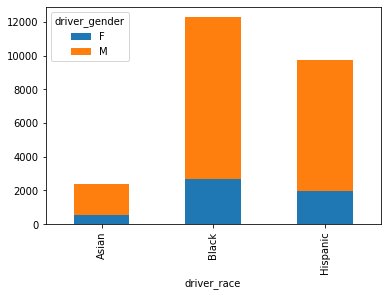

In [90]:
table2 = table.loc['Asian':'Hispanic']
display(table2)
table2.plot(kind="bar")
table2.plot(kind='bar', stacked =True)

In [92]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1': 'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1': 'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

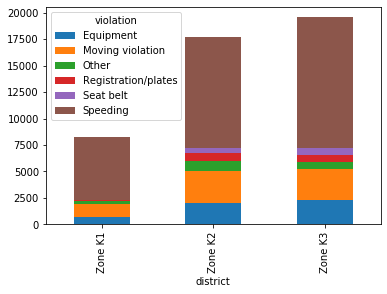

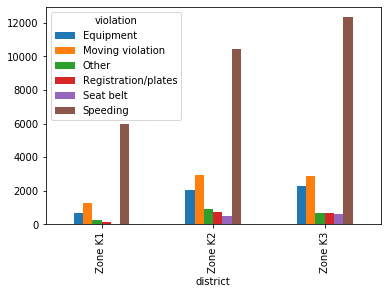

In [94]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)
k_zones.plot(kind='bar')
# Display the plot
plt.show()

<h1><font color='red'>How long might you be stopped for a violation?</font></h1>

### Analyzing an object column 

### Calculating the search rate
* Visualize how often searches were done after each violation type

In [96]:
search_rate = ri.groupby('violation').search_conducted.mean()

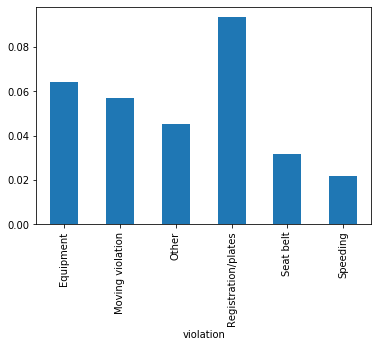

In [97]:
search_rate.plot(kind='bar')
plt.show()

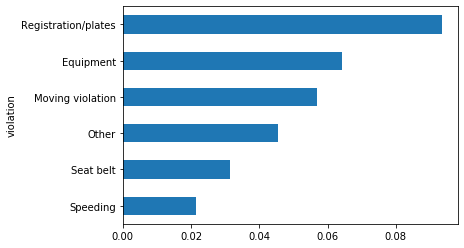

In [99]:
search_rate.sort_values().plot(kind='barh')
plt.show()

In [100]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' nan '30+ Min']
[ 8. 23. nan 45.]


violation_raw
APB                                 17.967033
Call for Service                    22.140805
Equipment/Inspection Violation      11.445340
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581509
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


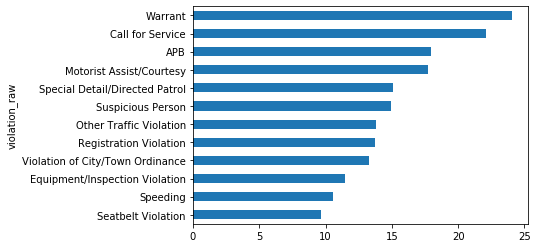

In [101]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# # Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

# <font color='red'>Analyzing the effect of weather on policing</font>

# Exploring the weather dataset 

In [102]:
weather = pd.read_csv('data/weather_ri.csv')

In [103]:
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


### column descriptions
* TAVG, TMIN, TMAX = TEMPERATURE
* AWND, WSF2 = WIND SPEED
* WT01... WT22 = BAD WEATHER CONDITIONS

In [104]:
weather[['AWND', 'WSF2']].head()

,AWND,WSF2
0,8.95,25.1
1,9.40,14.1
2,6.93,17.0
3,6.93,16.1
4,7.83,17.0


In [105]:
weather[['AWND', 'WSF2']].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


### Creating a box plot 

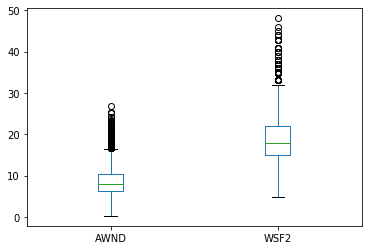

In [106]:
weather[['AWND', 'WSF2']].plot(kind='box')
plt.show()

In [107]:
#creae wind difference column
weather['WDIFF'] = weather.WSF2 - weather.AWND

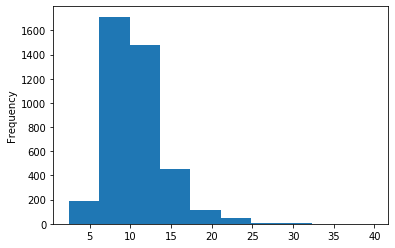

In [108]:
weather.WDIFF.plot(kind='hist')
plt.show()

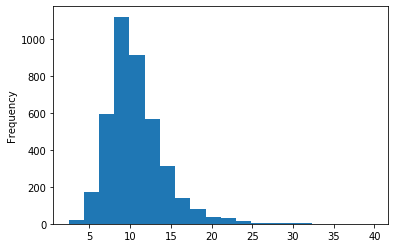

In [109]:
weather.WDIFF.plot(kind='hist', bins=20)
plt.show()

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


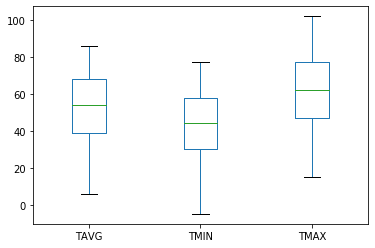

In [110]:

# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TAVG', 'TMIN', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


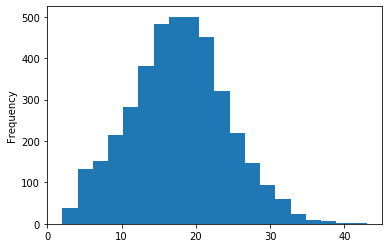

In [111]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)

# Display the plot
plt.show()

# <font color='red'>Categorizing the Weather</font> 

### Selecting data from a slice 

In [112]:
temp = weather.loc[:,'TAVG':'TMAX']

In [114]:
temp.shape

(4017, 3)

In [115]:
temp.head()

,TAVG,TMIN,TMAX
0,44.0,35,53
1,36.0,28,44
2,49.0,44,53
3,42.0,39,45
4,36.0,28,43


### Sum of the row values 

In [116]:
temp.sum(axis='columns').head()

0    132.0
1    108.0
2    146.0
3    126.0
4    107.0
dtype: float64

### Mapping new values to "stop duration"


In [117]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', nan, '30+ Min'], dtype=object)

In [119]:
#create map
mapping = {'0-15 Min': 'short', '16-30 Min': 'medium', '30+ Min':'long'}

In [121]:
ri['stop_length'] = ri.stop_duration.map(mapping)
ri.stop_length.dtype

dtype('O')

In [129]:
#change the dtype of stop_length
#change to category dtype
from pandas.api.types import CategoricalDtype
cat_dtype = CategoricalDtype(categories=['short', 'medium', 'long'], ordered=True)

ri['stop_length'] = ri['stop_length'].astype(cat_dtype)

In [130]:
ri.stop_length.dtype

CategoricalDtype(categories=['short', 'medium', 'long'], ordered=True)

In [131]:
ri.stop_length.head()

date_and_time
2005-01-04 12:55:00     short
2005-01-23 23:15:00     short
2005-02-17 04:15:00     short
2005-02-20 17:15:00    medium
2005-02-24 01:20:00     short
Name: stop_length, dtype: category
Categories (3, object): [short < medium < long]

## Categorizing the weather 

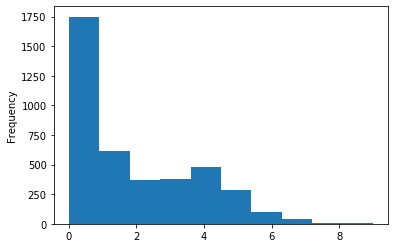

In [132]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

In [133]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3: 'bad', 4: 'bad', 5:'worse', 6:'worse', 7: 'worse', 8: 'worse',9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [135]:
# Create a list of weather ratings in logical order
cat_dtype = CategoricalDtype(categories=['good', 'bad', 'worse'], ordered=True)

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(cat_dtype)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]


# <font color='red'> Merging Datasets</font> 

# Merge weather data with policing data

### Example of syntax required:
newdf = pd.merge(left=df1, right=df2, left_on='column1', right_on='column_a', how='left')
* left = Left dataframe
* right = right dataframe
* left_on = key column in left dataframe
* right_on = key column in right dataframe
    * ideally, left_on and right_on should have the same data in them, even if named differently
* how = type of join

In [136]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

        date_and_time state   stop_date stop_time driver_gender driver_race  \
0 2005-01-04 12:55:00    RI  2005-01-04     12:55             M       White   
1 2005-01-23 23:15:00    RI  2005-01-23     23:15             M       White   
2 2005-02-17 04:15:00    RI  2005-02-17     04:15             M       White   
3 2005-02-20 17:15:00    RI  2005-02-20     17:15             M       White   
4 2005-02-24 01:20:00    RI  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs_relat

In [141]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_date', inplace=True)

(91741, 19)
(91741, 21)


In [142]:
ri_weather.columns

Index(['date_and_time', 'state', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district', 'inventory', 'frisk', 'stop_minutes', 'stop_length', 'DATE',
       'rating'],
      dtype='object')

# <font color='red'>Does weather affect the arrest rate? </font>

In [147]:
search_rate = ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

(12,)

In [144]:
search_rate.head()

violation         driver_gender
Equipment         F                0.039984
                  M                0.071496
Moving violation  F                0.039257
                  M                0.061524
Other             F                0.041018
Name: search_conducted, dtype: float64

### Unstack this series to convert to a DataFrame

In [148]:
search_rate.unstack()

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


In [149]:
type(search_rate)

pandas.core.series.Series

### Didn't work because you didn't save to a new variable

In [151]:
search_rate_df = search_rate.unstack()

In [152]:
type(search_rate_df)

pandas.core.frame.DataFrame

## Use a pivot_table to create the same dataframe without converting to a series first

In [154]:
ri.pivot_table(index = 'violation', columns='driver_gender', values='search_conducted')
#values is by default the mean of the values in the prescribed columns

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


In [155]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.09025408486936048


In [156]:
# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

rating
good     0.086842
bad      0.090479
worse    0.106527
Name: is_arrested, dtype: float64


In [157]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

violation            rating
Equipment            good      0.058995
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076923
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013404
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


In [158]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

violation            rating
Equipment            good      0.058995
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076923
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013404
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


In [164]:
# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

0.05804964058049641


In [165]:
# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

rating
good     0.013404
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


In [166]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

rating                   good       bad     worse
violation                                        
Equipment            0.058995  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076923  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013404  0.013314  0.016886


In [167]:
# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.058995  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076923  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013404  0.013314  0.016886
